# Анализ бизнес-показателей приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

**Цель исследования:**

Провести анализ данных бизнес-показателей приложения Procrastinate Pro+. Выявить причины неэффективности привлечения пользователей. Сформулировать рекомендации для отдела маркетинга

**Задачи исследования:**

* Подготовить данные к анализу
* Изучить, как люди пользуются продуктом
* Сколько денег приносит каждый клиент
* Рассчитать и проанализировать метрики
* Визуализировать результаты на графиках
* На оснавании метрик выявить возможные причины неэффективности и дать рекомендации маркетологам


**Исходные данные:**

Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта,
`orders_info_short.csv` — информацию о покупках,
`costs_info_short.csv` — информацию о расходах на рекламу.


`visits_info_short.csv`:

* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

`orders_info_short.csv`: 

* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

`costs_info_short.csv`: 

* `Channel` — идентификатор рекламного источника,
* `Dt` — дата проведения рекламной кампании,
* `Costs` — расходы на эту кампанию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Таблица-visits" data-toc-modified-id="Таблица-visits-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Таблица visits</a></span></li><li><span><a href="#Таблица-orders" data-toc-modified-id="Таблица-orders-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Таблица orders</a></span></li><li><span><a href="#Таблица-costs" data-toc-modified-id="Таблица-costs-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Таблица costs</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Профили-пользователей" data-toc-modified-id="Профили-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Профили пользователей</a></span></li><li><span><a href="#Анализ-пользователей-в-разбивке-по-странам" data-toc-modified-id="Анализ-пользователей-в-разбивке-по-странам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ пользователей в разбивке по странам</a></span></li><li><span><a href="#Анализ-пользователей-в-разбивке-по-устройствам" data-toc-modified-id="Анализ-пользователей-в-разбивке-по-устройствам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ пользователей в разбивке по устройствам</a></span></li><li><span><a href="#Анализ-пользователей-в-разбивке-по-каналам-привлечения" data-toc-modified-id="Анализ-пользователей-в-разбивке-по-каналам-привлечения-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ пользователей в разбивке по каналам привлечения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Анализ-затрат-на-рекламу" data-toc-modified-id="Анализ-затрат-на-рекламу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ затрат на рекламу</a></span></li><li><span><a href="#Расчет-стоимости--привлечение-одного-покупателя-из-каждого-источника" data-toc-modified-id="Расчет-стоимости--привлечение-одного-покупателя-из-каждого-источника-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет стоимости  привлечение одного покупателя из каждого источника</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы-для-привлечения-пользователей" data-toc-modified-id="Оценка-окупаемости-рекламы-для-привлечения-пользователей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы для привлечения пользователей</a></span><ul class="toc-item"><li><span><a href="#Анализ-общей-окупаемости-рекламы" data-toc-modified-id="Анализ-общей-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ общей окупаемости рекламы</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-странам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по странам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Причины-неэффективности-привлечения-пользователей" data-toc-modified-id="Причины-неэффективности-привлечения-пользователей-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Причины неэффективности привлечения пользователей</a></span></li><li><span><a href="#Рекомендации-для-отдела-маркетинга-для-повышения-эффективности" data-toc-modified-id="Рекомендации-для-отдела-маркетинга-для-повышения-эффективности-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Рекомендации для отдела маркетинга для повышения эффективности</a></span></li></ul></li></ul></div>

## Обзор данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
#открываем файлы с данными
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  
    pd.read_csv('orders_info_short.csv'),  
    pd.read_csv('costs_info_short.csv'),  
)

In [3]:
#смотрим первые строки таблиц
display(visits.head(), orders.head(), costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
#смотрим общую информацию по таблицам
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


### Подготовка данных

#### Таблица visits

In [5]:
#приводим название столбцов в порядок
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [6]:
#смотрим общую информацию
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null object
session_end      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
# меняем тип данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
#смотрим уникальные значения
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
77538669605      1
275054308374     1
466896385517     1
397837182455     1
437337554992     1
Name: user_id, Length: 150008, dtype: int64

In [9]:
#смотрим уникальные значения
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [10]:
#смотрим уникальные значения
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [11]:
#смотрим уникальные значения
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [12]:
#числовое описаные данных
visits[['session_start', 'session_end']].describe()

,session_start,session_end
count,309901,309901
unique,306813,306793
top,2019-10-22 17:17:39,2019-08-27 20:15:44
freq,3,3
first,2019-05-01 00:00:41,2019-05-01 00:07:06
last,2019-10-31 23:59:23,2019-11-01 01:38:46


In [13]:
#проверяем дубликаты
visits.duplicated().sum()

0

#### Таблица orders

In [14]:
#приводим название столбцов в порядок
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [15]:
#смотрим общую информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null object
revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [16]:
#меняем тип данных
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [17]:
#смотрим уникальные значения
orders['user_id'].value_counts()

901180916748    22
883098437811    20
512471511263    19
75337957494     19
295795879965    19
                ..
389231879246     1
550744906785     1
314873470284     1
502292589695     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

In [18]:
#числовое описание данных 
orders['event_dt'].describe()

count                   40212
unique                  40163
top       2019-10-31 06:23:16
freq                        2
first     2019-05-01 00:28:11
last      2019-10-31 23:56:56
Name: event_dt, dtype: object

In [19]:
#числовое описание данных 
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [20]:
#проверяем дубликаты
orders.duplicated().sum()

0

#### Таблица costs

In [21]:
#приводим название столбцов в порядок
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [22]:
#смторим общую информацию
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [23]:
#меняем тип данных
costs['dt'] = pd.to_datetime(costs['dt'])

In [24]:
#смотрим уникальные значения
costs['channel'].value_counts()

OppleCreativeMedia    180
WahooNetBanner        180
AdNonSense            180
RocketSuperAds        180
MediaTornado          180
LeapBob               180
FaceBoom              180
lambdaMediaAds        180
TipTop                180
YRabbit               180
Name: channel, dtype: int64

In [25]:
#чсиловое описание данных
costs['dt'].describe()

count                    1800
unique                    180
top       2019-08-26 00:00:00
freq                       10
first     2019-05-01 00:00:00
last      2019-10-27 00:00:00
Name: dt, dtype: object

In [26]:
#числовое описание данных
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

In [27]:
#проверяем дубликаты
costs.duplicated().sum()

0

### Вывод

У нас есть три выгрузки из развлекательного приложения Procrastinate Pro+. В таблицах данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

На данном этапе мы подготовили данные к анализу. Также проверили, что в данных отсутствуют дубликаты и что тип данных во всех колонках соответствует значениям.

Уникальных пользователей у нас 150008. В логах имеются данные о пользователях из 4х стран - США, Англии, Франции, Германии. Среди данных об устройствах в логах представлены iPhone, Android, PC, Mac. Больше всего в логах пользователей iPhone (112603). 

В логах о заказах у нас присутствует 8881 уникальный пользователь, самый часто заказывающий - пользователь 901180916748. Всего в выгрузке 40212 строк с информацией о заказах. В среднем каждый заказ совершается на сумму 5.37 у.е. Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. Также видим, что 1, 2, 3 и 4 квартили - все они равны 4.99. Можно предположить, что это стоимость подписки.

Всего 1800 строк с данными о затратах на маркетинг. Из них 180 уникальных строк с датами, то есть, в логах собраны данные за 180 дней. В выгрузке представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds' Средние и медианные затраты на маркетинг разнятся (58.6 и 12.3 соответственно) - возможно, что на какие-то каналы уходит больше трат, на какие-то меньше. Максимальная трата на маркетинг - 630 у.е., минимальные - 0.8.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

In [28]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [29]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [30]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [31]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [32]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [34]:
# функция для визуализации конверсиим

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [35]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных


###  Профили пользователей

In [36]:
#получаем профили пользователей
profiles = get_profiles(visits, orders, costs)

In [37]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [38]:
#определяем минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

In [39]:
print('Минимальная дата привлечения пользователей:', min_analysis_date)
print('Максимальная дата привлечения пользователей:', observation_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


### Анализ пользователей в разбивке по странам

In [40]:
#функция считает количество  платящих пользователей и их долю, общее количество пользователей
def pivot_result(column, df):
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].count()
    result['users_share'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_share'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)
    result['share'] = ((result['payer_users_cnt'] / result['payer_users_cnt'].sum()) * 100)    
    return result.sort_values(by='users_share', ascending=False).style.format({'users_share': '{:.2f}%',\
                                                                               'payer_share': '{:.2f}%', 'share': '{:.2f}%'})

In [41]:
#смотрим количество пользователей по странам
pivot_result('region', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share,share
region,,,,,
United States,100002,66.66%,6902,6.90%,77.72%
UK,17575,11.72%,700,3.98%,7.88%
France,17450,11.63%,663,3.80%,7.47%
Germany,14981,9.99%,616,4.11%,6.94%


По полученным результатам видим, что больше всего пользователей из США - 66.66%. Платящих пользователей также больше всего в США -77.72%  В Англии и Франции примерно одинаковое количество пользователей ~ 12% и примерно одинаковое количество платящих пользователей- 7-8%. Меньше всего пользователей в Германии - 9.99%, и платящих пользователей -6.94% 

Также видим, что доля платящих пользователей из США - 6.9%. Среди пользователей из Англии на 17575 пользавателей, платящих - 3.98% - 700 человек. Примерно такое же соотношение и для пользователей из Франции - 3.8% платящих пользователей. Среди пользователей Германии на 14981 пользователей, 616 человек - платящие - 4.1%.

### Анализ пользователей в разбивке по устройствам

In [42]:
#смотрим количество пользователей по устройствам
pivot_result('device', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share,share
device,,,,,
iPhone,54479,36.32%,3382,6.21%,38.08%
Android,35032,23.35%,2050,5.85%,23.08%
PC,30455,20.30%,1537,5.05%,17.31%
Mac,30042,20.03%,1912,6.36%,21.53%


По полученным данным видим, что больше всего пользователи используют мобильные устройства или планшеты.
Больше всего заходят с iPhone - 36.32% пользователей. Пользователей Android - 23%.
Пользователей PC и Mac примерно одинаковое количество - чуть больше 20%. По платящим пользователям примерно такая же картина, только пользователи Мас платят чаще пользователей PC, больше всего платящих пользователей у iPhone - 38%.

Больше всего доля платящих пользователей у пользователей Mac: 6.36% -1912 человек из 30042 платят за продукт. Среди пользователей iPhone - 54479 человек доля платящих равна 6.21%. Для пользователей Android - 35032 человек она составляет 5.85%. Среди пользователей PC 30455 платящих меньше всего - 5.05% -1537 человек.
 

### Анализ пользователей в разбивке по каналам привлечения

In [43]:
#смотрим количество пользователей по каналам привлечения
pivot_result('channel', profiles)

,users_cnt,users_share,payer_users_cnt,payer_share,share
channel,,,,,
organic,56439,37.62%,1160,2.06%,13.06%
FaceBoom,29144,19.43%,3557,12.20%,40.05%
TipTop,19561,13.04%,1878,9.60%,21.15%
OppleCreativeMedia,8605,5.74%,233,2.71%,2.62%
LeapBob,8553,5.70%,262,3.06%,2.95%
WahooNetBanner,8553,5.70%,453,5.30%,5.10%
RocketSuperAds,4448,2.97%,352,7.91%,3.96%
MediaTornado,4364,2.91%,156,3.57%,1.76%
YRabbit,4312,2.87%,165,3.83%,1.86%


Видим, что больше всего приходит пользователей по органическому каналу примерно 38%, далее по числу пользователей идут источники FaceBoom - 19% и TipTop - 13%.Самый непопулярный канал это lambdaMediaAds по этому каналу приходит всего 1.43%

Больше всего платящих пользователей у канала FaceBoom - 40%, 21% из TipTop и только 13% - из органического трафика.
По остальным каналам распределение равномерное примерно 3-5%, меньше всего платящих у канала  MediaTornado - 1.76%

Самая высокая доля платящих пользователей приходится на каналы FaceBoom - 12.20%, AdNonSense -11.34% и lambdaMediaAds - хоть этот канал самый не популярный канал привлечения - процент платящих 10.47%- 225 пользователей из 2149 платят. Менее всего конвертируются пользователи из каналов organic - 2.06% всего 1160 пользоватей из 56439 оплатили приложение, OppleCreativeMedia - 2.71% и LeapBob - 3.06%.

### Вывод

Создали пользовательские профили, определили минимальную и максимальную даты привлечения - это 2019-05-01 00:00:00 и 2019-10-27 00:00:00.

Выяснили в каких странах пользователи приходят в приложение - это США, Англия, Франция и Германия. Больше всего пользователей приходится на США - 100002 пользоватей, это 66.66%, меньше всего в Германии -  10 %, в Англии и Франции почти одинаковое количество пользователей -  примерно 12%. Построили таблицу, отражающую количество пользователей и долю платящих из каждой страны. Самая большая доля платящих пользователей в США - 6.90% (6902 пользователей), в Германии - 4.11% платящих. В Англии и Франции доля почти одинаковая 3.98% и 3.80% соответственно.

Узнали какими устройствами пользуются клиенты - это iPhon, Android, PC и Mac. Больше всего пользователей используют iPhone - 54479 пользователей это 36.32%, меньше всего Мас- 20.03%, пользователей Android - 23%,  пользователей РС - 20.30%. Построили  таблицу, отражающую количество пользователей и долю платящих для каждого устройства. Самая большая доля платящих пользователй Мас - 6.36% (1912 пользователей на 30042), доля платящих пользователей iPhone - 6.21%, Android - 5.85%, PC - 5.05% платящих.

Изучили рекламные источники привлечения это: FaceBoom, TipTop, organic, WahooNetBanner, AdNonSense, RocketSuperAds, LeapBob, OppleCreativeMedia, lambdaMediaAds, YRabbit, MediaTornado. Больше всего пользователей приходит по каналу organic - 56439 пользователей это 37.62%,  на втором и третьем месте FaceBoom - 19.43%	и TipTop - 13.04%, меньше всего пользователей  приходит по каналу  lambdaMediaAds -1.43%. Построили таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. Самая большая доля платящих пользователй FaceBoom - 12.20%, AdNonSense -11.34% и lambdaMediaAds, хоть этот канал самый не популярный канал привлечения - процент платящих 10.47%- 225 пользователей из 2149 платят.


## Маркетинг

### Анализ затрат на рекламу

Сколько денег потратили? Всего / на каждый источник / по времени

In [44]:
print('Всего на маркетинг потрачено:', round(sum(costs['costs']), 1))

Всего на маркетинг потрачено: 105497.3


In [45]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


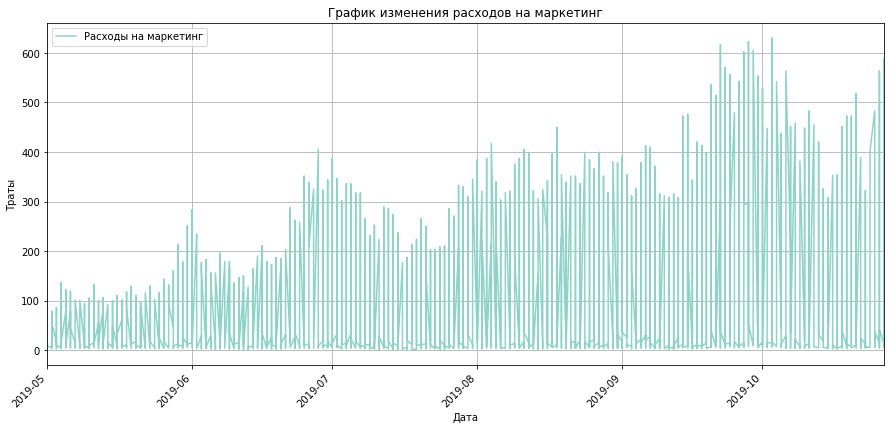

In [46]:
costs.plot(y='costs', 
           x='dt',
           figsize=(15, 7), 
           grid=True, 
           rot=45,        
           label='Расходы на маркетинг',                   
           legend=True,
           colormap='Set3') 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

По полученным данным видим, что с течением времени увеличиваются расходы на маркетинг. В мае расходы были примерно 100-150 у.е. Далее расходы постепенно увеличиваются. В конце сентября начале октября был пик расходов примерно 630 у.е. После чего началось снижение до 310, а затем к концу октября вновь увеличились до 590.

Выясним, как траты распределены по источникам.

In [47]:
#таблица трат по источникам
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report['share'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100)
channel_costs_report.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.3,51.90%
FaceBoom,32445.6,30.75%
WahooNetBanner,5151,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833,1.74%
LeapBob,1797.6,1.70%
lambdaMediaAds,1557.6,1.48%
MediaTornado,954.48,0.90%


Больше всего трат на маркетинг приходится на канал TipTop 51.9%. За ним идет канал FaceBoom -30.75%.Далее идут низкозатратные источники WahooNetBanner - 4.88%, AdNonSense -3.71%, OppleCreativeMedia - 2.04%. На оставшиеся источники приходится 1-2% трат.

Визуализируем изменения метрик во времени

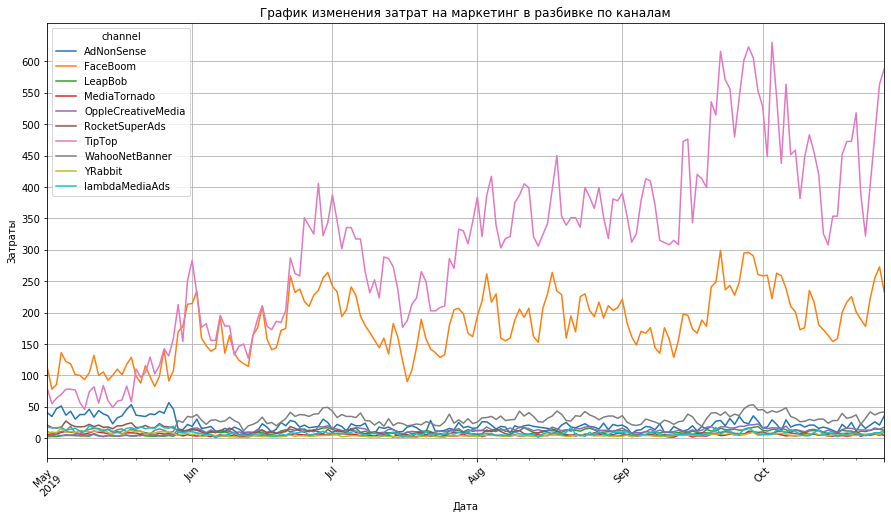

In [48]:
filtered_channel = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_channel.plot(                                             
           figsize=(15, 8), 
           grid=True, 
           rot=45,        
           label='Каналы',                      
           legend=True,
          
) 

plt.yticks(np.arange(0, 650, 50)) 
plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()


Больше всего затрат на маркетинг у TipTop и FaceBoom. У TipTop к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom в среднем  200. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник TipTop возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, так как на этом графике данные по ним недостаточно показательны.

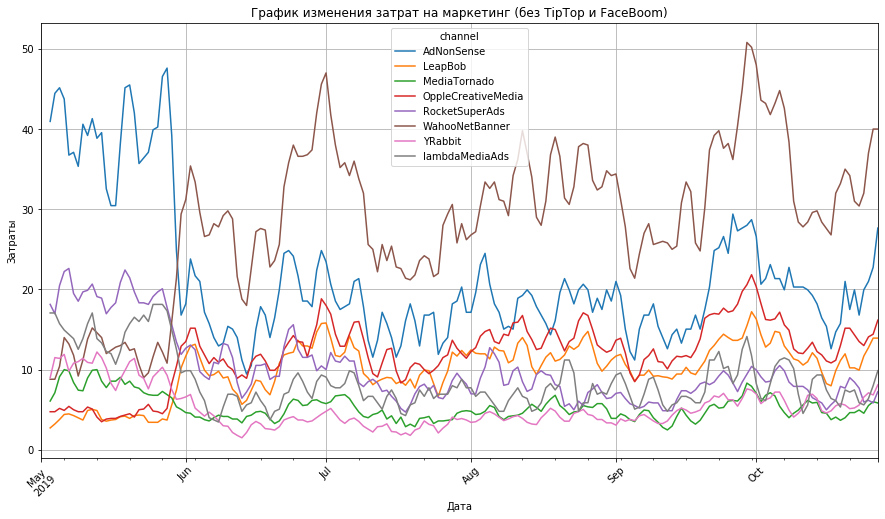

In [49]:
filtered_channel2 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

filter_data(filtered_channel2, 3).plot(                                             
           figsize=(15, 8), 
           grid=True, 
           rot=45,        
           label='Каналы',                      
           legend=True,
           
) 

plt.yticks(np.arange(0,  60, 10)) 
plt.title('График изменения затрат на маркетинг (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Среди рекламных источников кроме TipTop и FaceBoom с июня начали расти траты на WahooNetBanner к октябрю их число превысило 50 у.е. Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года  в среднем с 45 до 20. По остальным источникам траты варьируются в пределах 3-20 у.е.

###  Расчет стоимости  привлечение одного покупателя из каждого источника

Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Будем использовать профили пользователей.

In [50]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Информация о стоимости привлечения есть у нас в колонке 'acquisition_cost'.

In [51]:
profiles[['acquisition_cost']].describe()

,acquisition_cost
count,150008.000000
mean,0.703278
std,0.954097
min,0.000000
25%,0.000000
50%,0.247500
75%,1.108943
max,3.715385


Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.71 у.е.

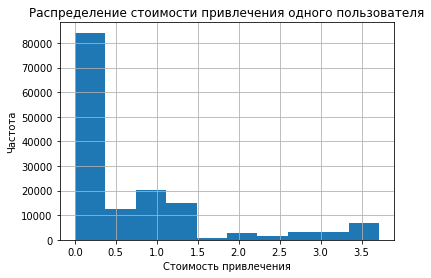

In [52]:
profiles['acquisition_cost'].hist(bins=10)
plt.title('Распределение стоимости привлечения одного пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Вероятно, это органический трафик.

In [53]:
#Посмотрим на CAC для каждого источника трафика.
cac_channel = pd.DataFrame()
cac_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самый дорогой трафик - TipTop, его средняя стоимость - 2.80 за пользователя, далее идет FaceBoom и AdNonSense - примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

###  Вывод

Посчитали общую сумму расходов на маркетинг - 105497.3 у.е.  Выснили как траты распределены по источникам. Больше всего затрат на маркетинг у TipTop и FaceBoom. У TipTop к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom в среднем 200.  С июня начали расти траты на WahooNetBanner, к октябрю их число превысило 50 у.е. Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года в среднем с 45 до 20. По остальным источникам траты варьируются в пределах 3-20 у.е. Визуализировали изменения метрик во времени.

Рассчитан средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Максимальная стоимость привлечения пользователя - 3.71 у.е. На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей - это органический трафик.

Самый дорогой трафик - TipTop, средняя стоимость - 2.80 за пользователя, далее идет FaceBoom и AdNonSense примерно в равной ценовой категории 1.11 и 1.01 соответственно. Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

## Оценка окупаемости рекламы для привлечения пользователей


Момент анализа у нас 1.11.2019, а горизонт анализа - 14 дней. Из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим.

In [54]:
#исключим пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

In [55]:
# момент анализа
observation_date = datetime(2019, 11, 1).date() 

# горизонт анализа 
horizon_days = 14 

### Анализ общей окупаемости рекламы

Оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

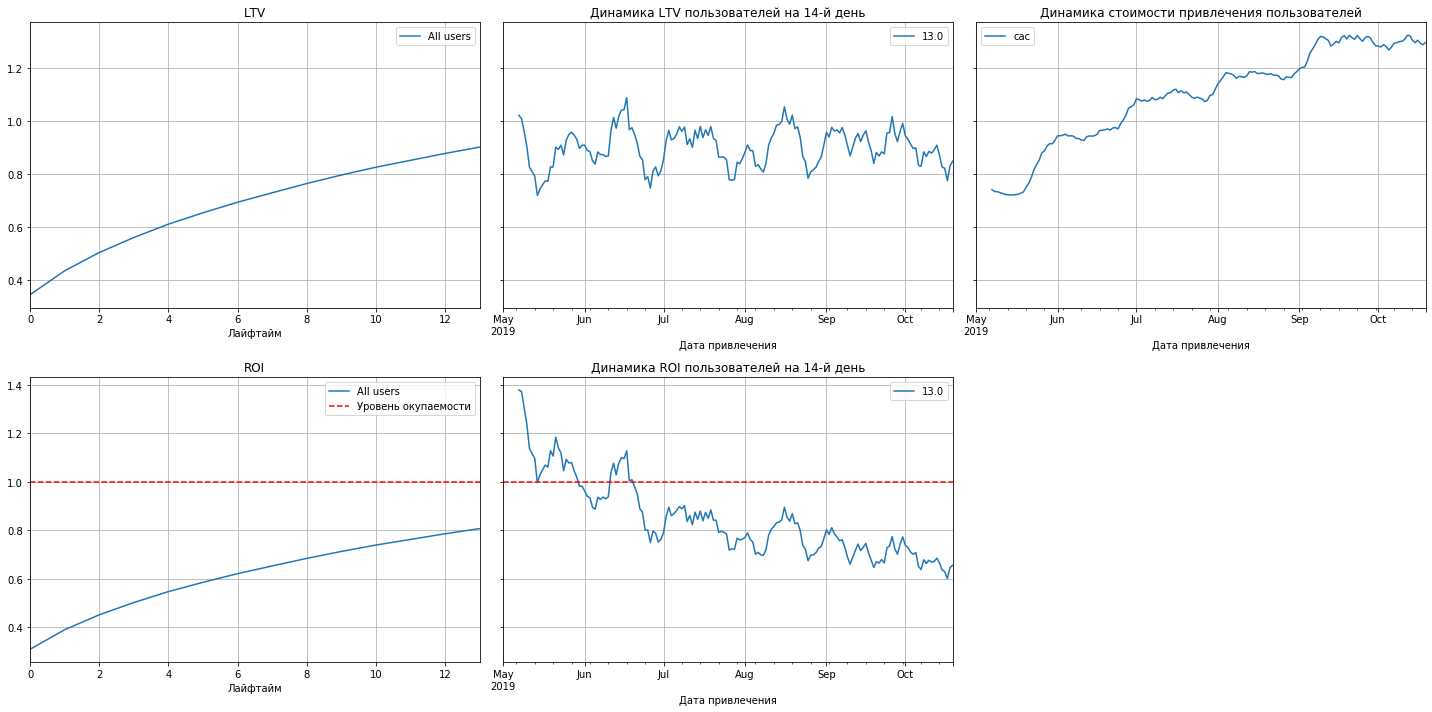

In [56]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:

1. Реклама не окупается к концу 2й недели. ROI — около 80%.
2. CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
3. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4. ROI пользователей падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, каналу и устройству первого посещения.

### Анализ окупаемости рекламы с разбивкой по устройствам

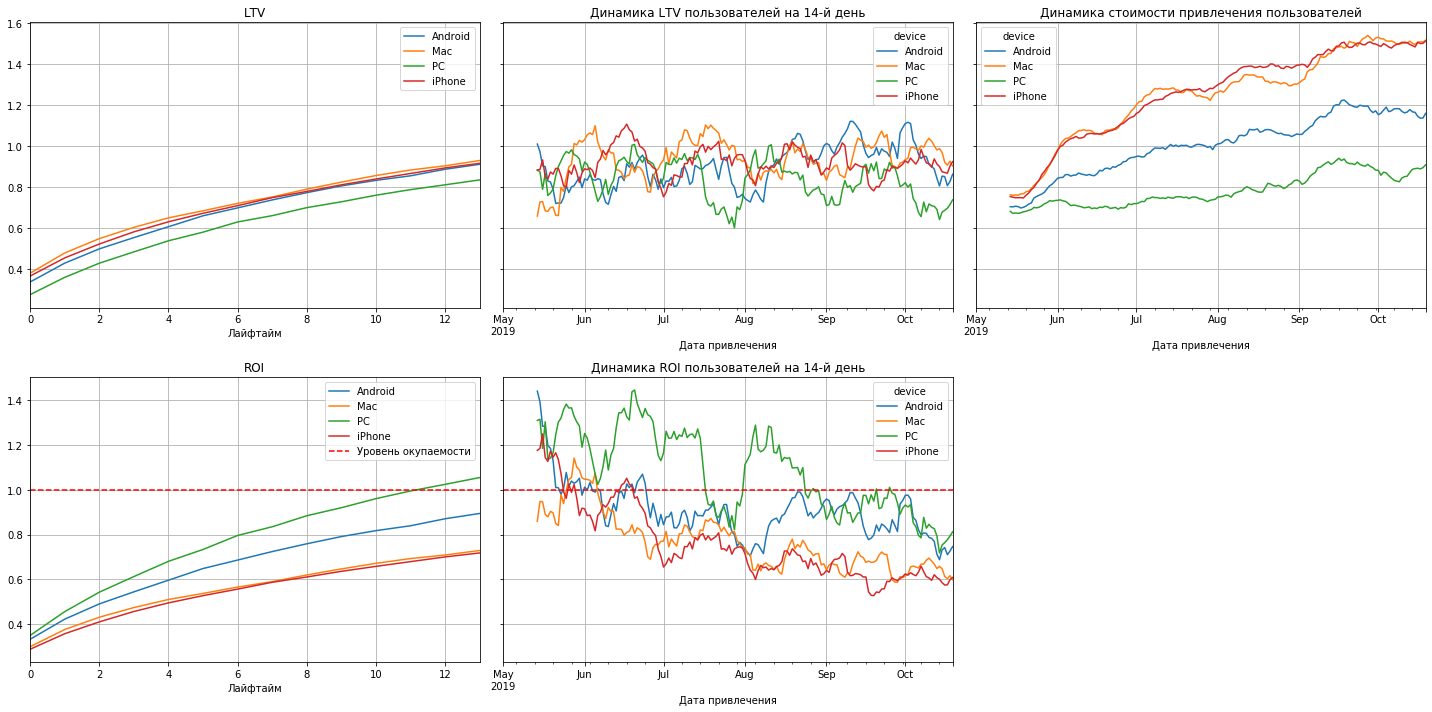

In [57]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи android, iphone и PC окупались до июня, пользователи Мас в конце июня начале июля тоже окупались,далее уровень окупаемости снизился, особенно для владельцев Mac и Iphone. Пользователи РС окупались до конца августа, ROI всех остальных устройств был уже ниже уровня начиная с июня. LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

Направить внимание следует на владельцев Mac и iPhone - стоимость их привлечения высока и растет от месяца к месяцу, а окупаемоcть падает.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()

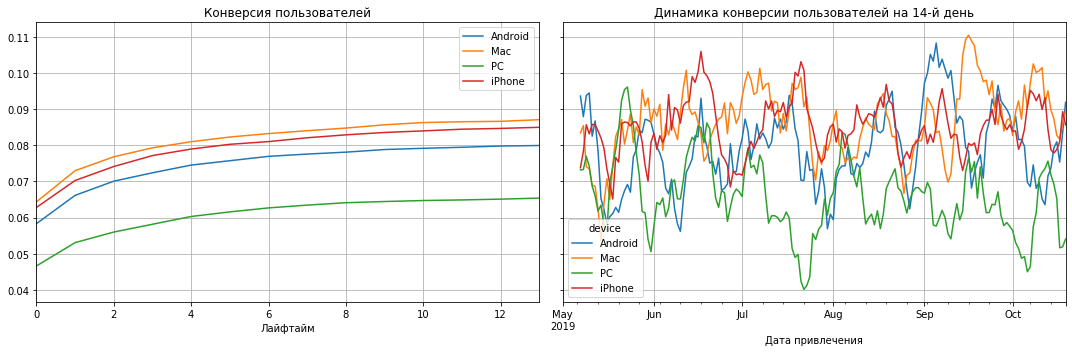

In [58]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, Android и iPhone конвертируются хорошо, причём постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

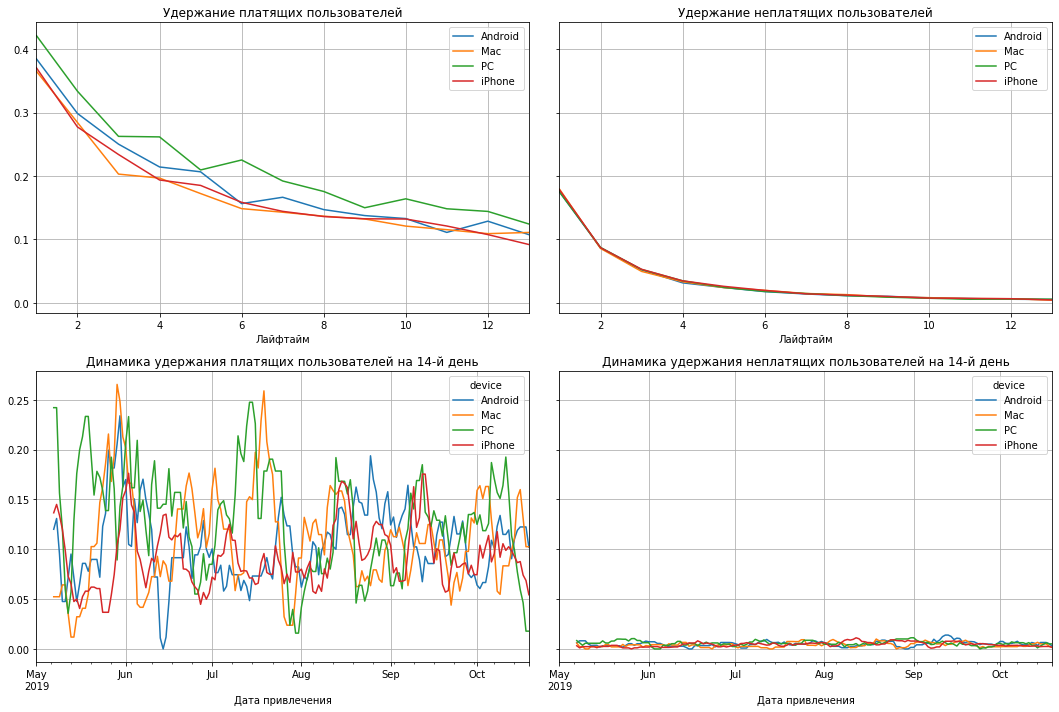

In [59]:
#смотрим удержание с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По полученным данным не видно, чтобы пользователи каких-то  определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

### Анализ окупаемости рекламы с разбивкой по странам

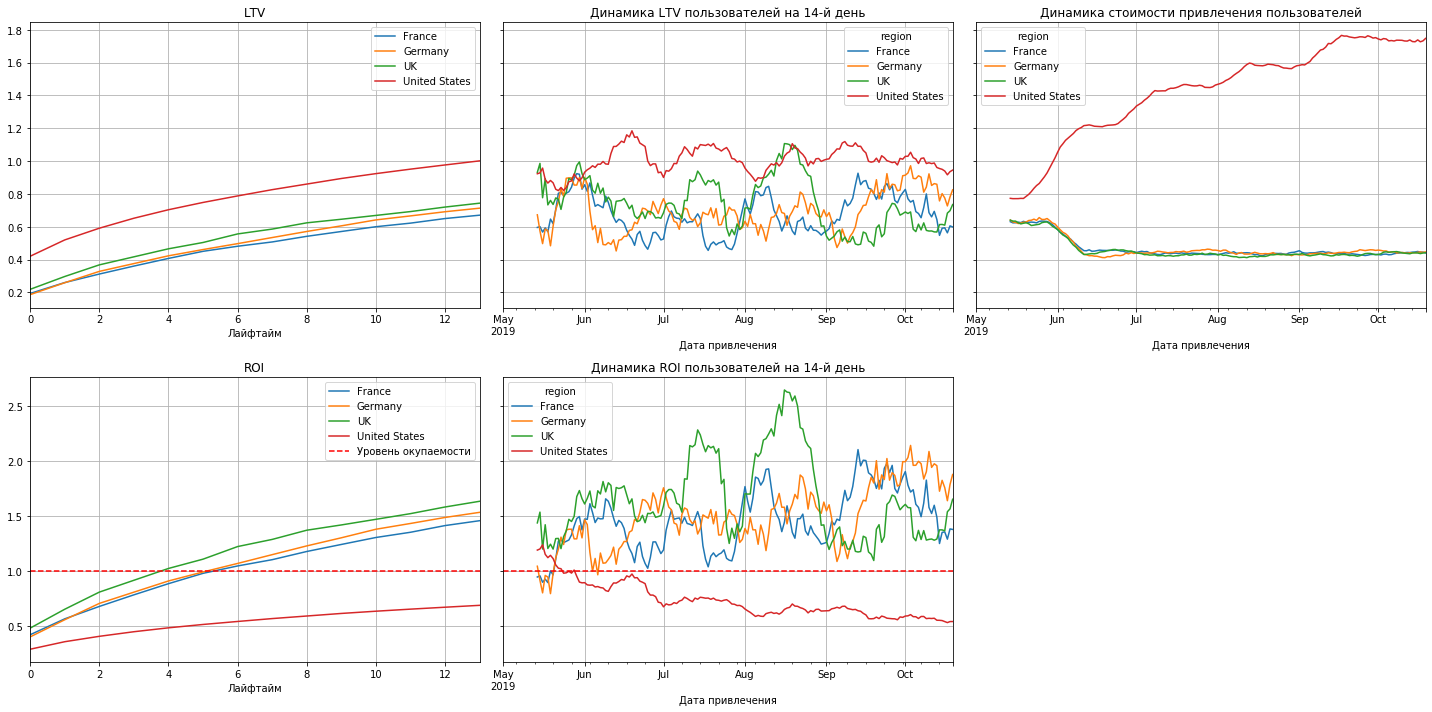

In [60]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам видим: 

1. Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США.
2. При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
3. LTV всё так же подвержен сезонности, но стабилен.
4. Лучше всего окупается Англия и Германия. Хуже всех - США. Причем окупаемость пользователей начала падать с конца мая 2019 года. Также видим что с конца мая 2019 года резко изменилась динамика стоимости привлечения, скорее всего было перераспределение рекламного бюджет, в  США стали больше вкладывать на рекламу, одновременно с этим в других странах стоимость привлечения понизилась.

Значит, надо направить внимание на пользователей из США.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()

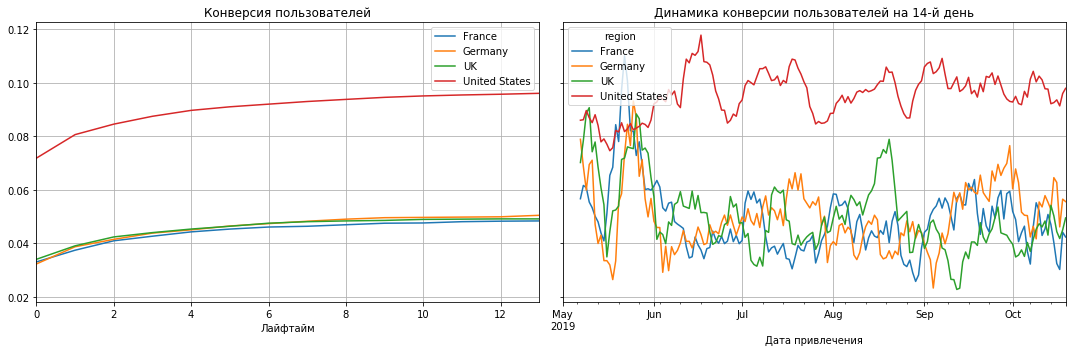

In [61]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видим пользователи США конвертируют  хорошо.
Слабая конверсия у пользователей из Англии, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

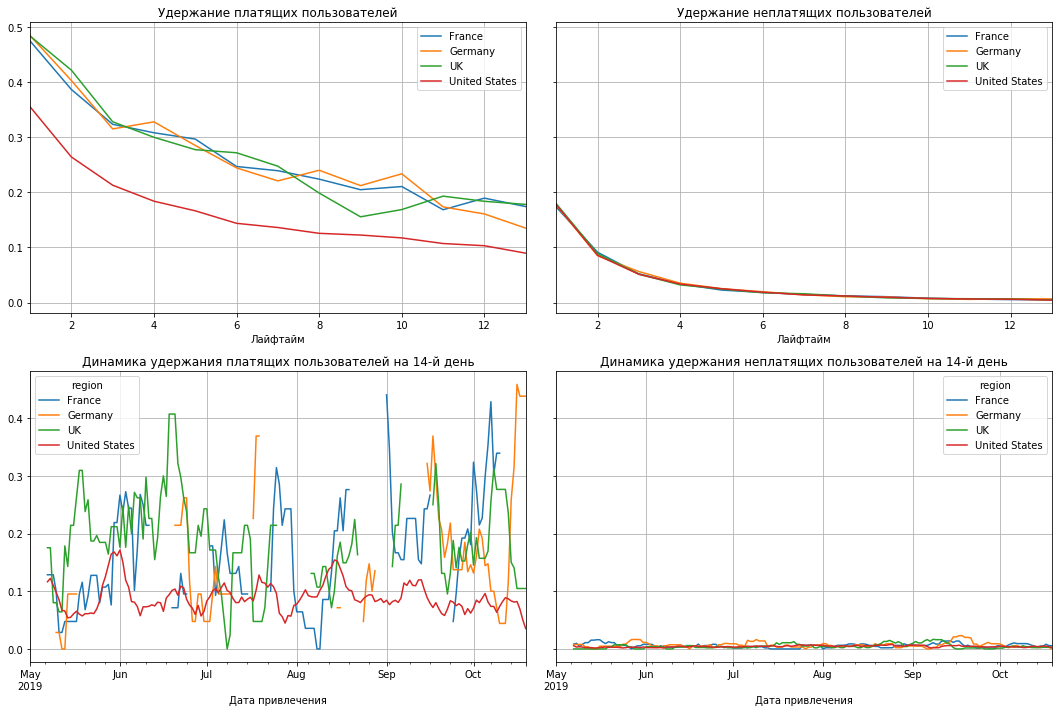

In [62]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим, что пользователи из США явно плохо удерживаются.  Соответственно реклама привлекает не качественных пользователей, так скажем "одноразовых".

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

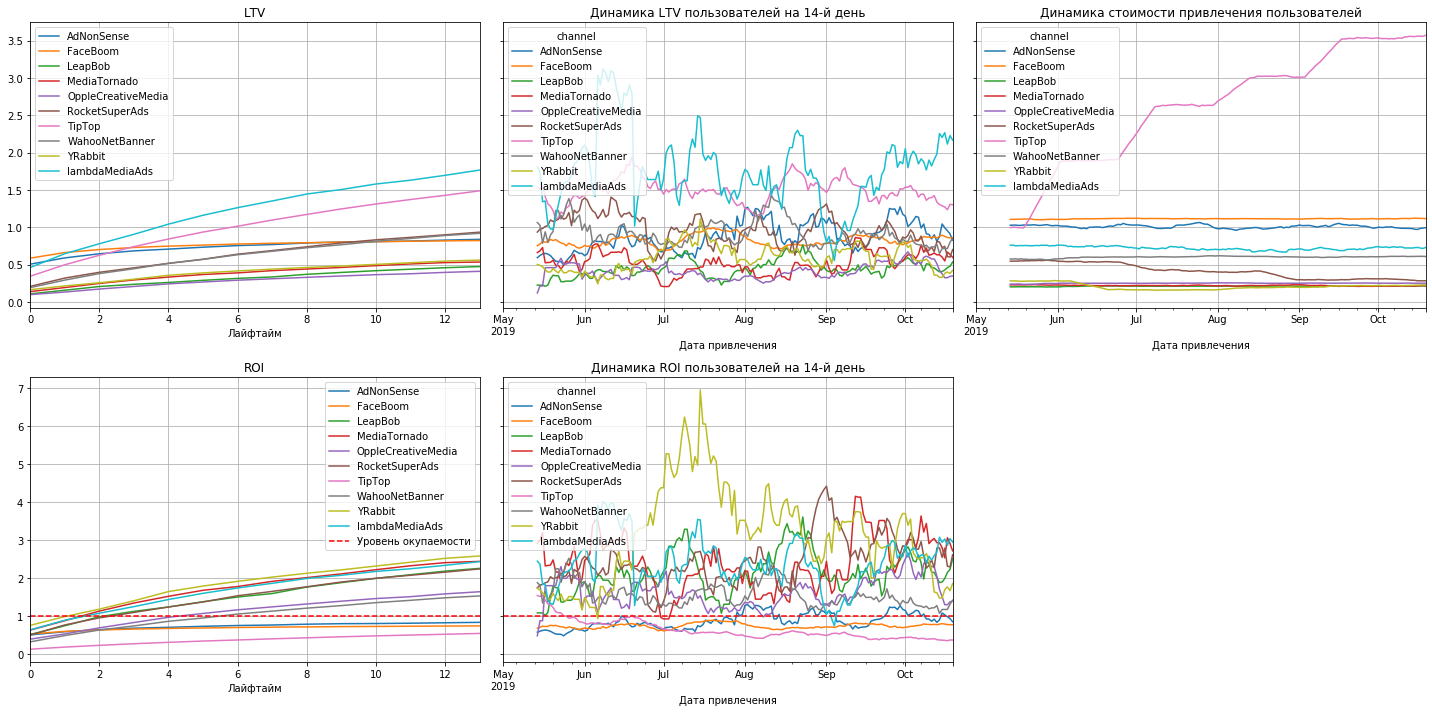

In [63]:
#смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По полученным данным видим: 

1. Большой рост стоимости привлечения пользователей  канала TipTop. Слишком много средств было потрачено на этот канал привлечения, но желаемого результата не вышло. Реклама не окупилась.
2. Не окупаются пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop - это три самых дорогих канала привлечения.
3. Хорошо показала себя рекламная сеть YRabbit унеё самы высокий ROI.

Посмотрим как изменится ROI СШA если исключить канал привлечения ТipTop.

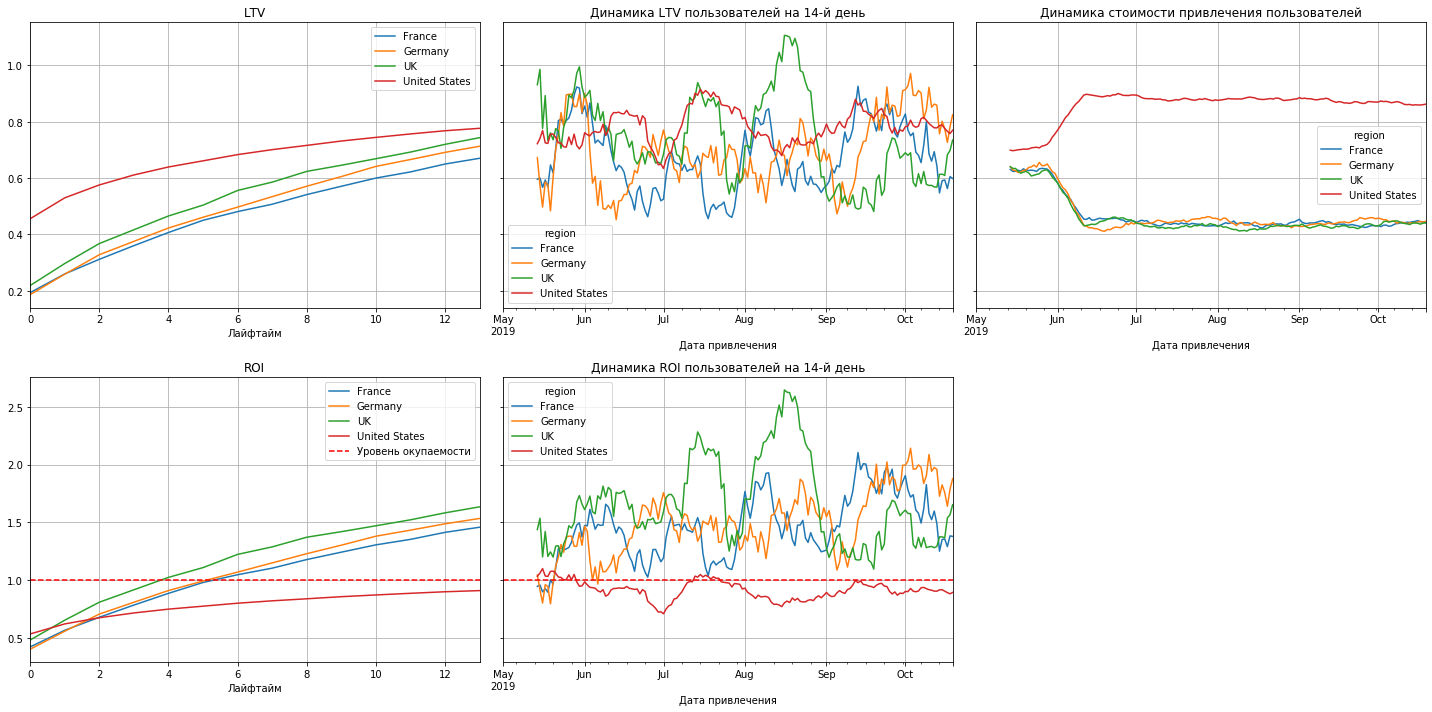

In [64]:
# смотрим динамику по странам без TipTop

profiles1=profiles.query('channel != "TipTop"')
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Видим, что если иключить TipTop окупаемость рекламы в США стала на много выше, ROi примерно 90%.

Посмотрим на ROI США если исключить все каналы привлечения которые не окупаются.

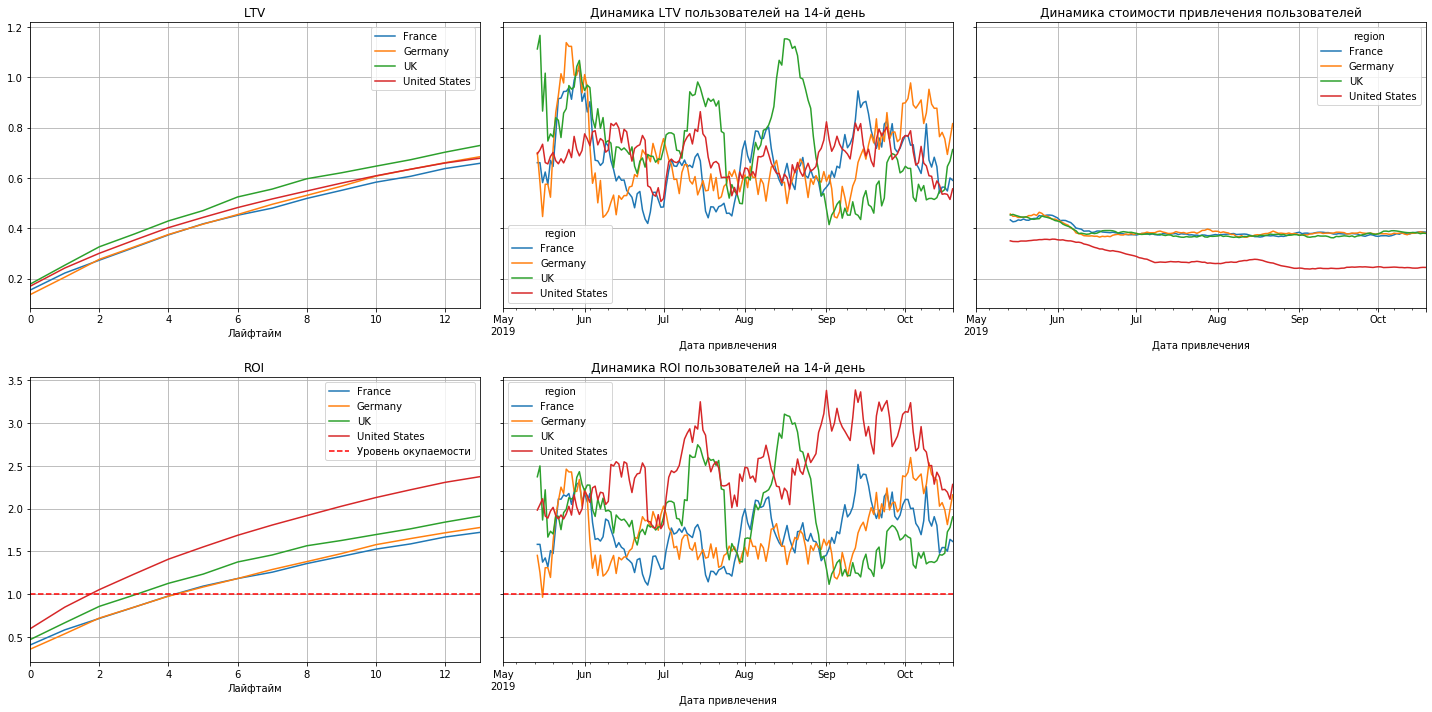

In [65]:
profiles2=profiles.query('channel != "TipTop" and channel != "FaceBoom" and channel != "AdNonSense"')

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles2, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

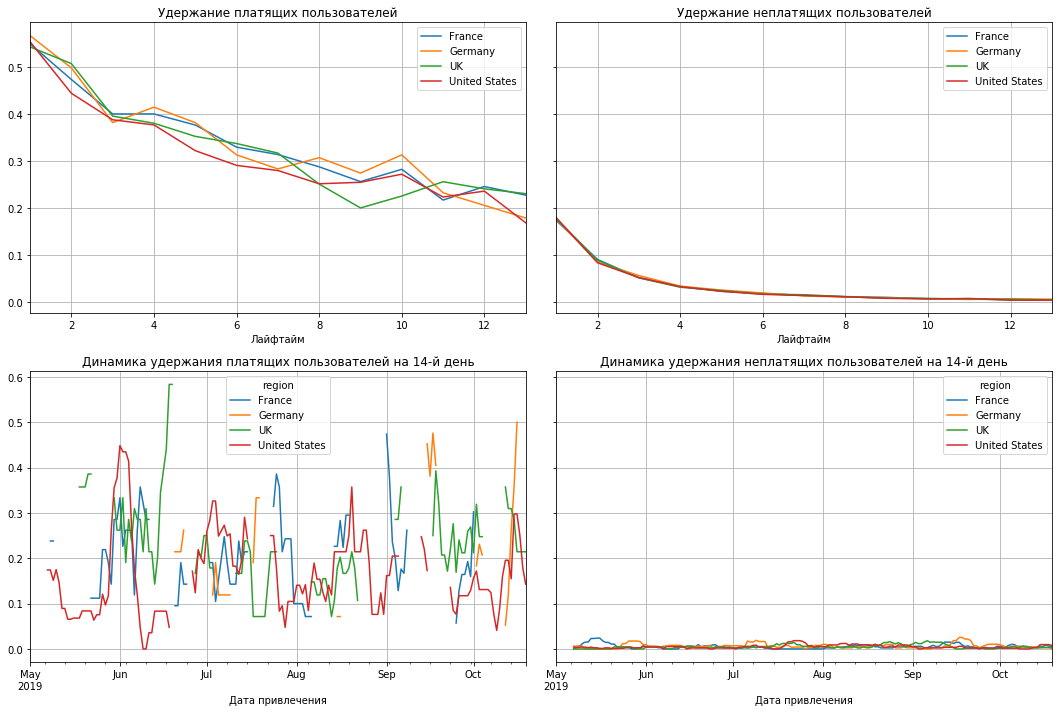

In [66]:
# смотрим удержание с разбивкой по странам без AdNonSense, FaceBoom, TipTop

retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим, что ROI CША без AdNonSense, FaceBoom, TipTop выше, чем в других странах. Можно сделать вывод, что эти каналы привлекают много пользователей, но затраты на привлечения пользователя слишком большие, поэтому они не окупаются. Как мы помним удержание в США плохое, если посмотреть удержание по странам с исключением этих трех каналов - оно выравнивается.

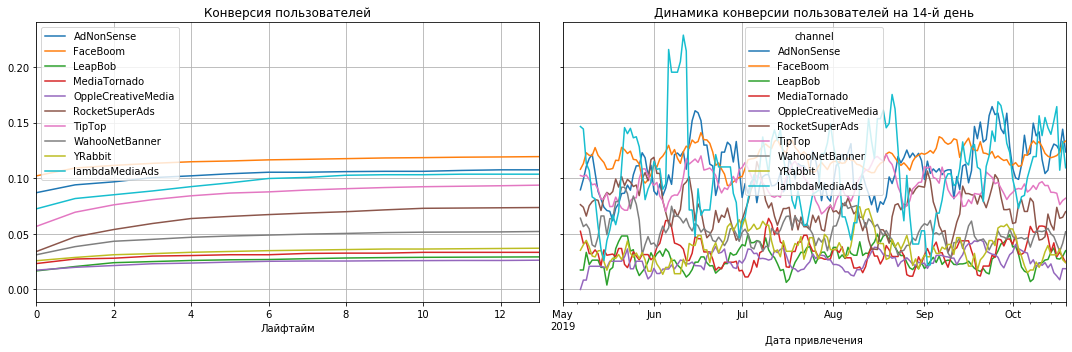

In [67]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Плохо конвертируются пользователи из каналов OppleCreativMedia, LeapBod, MediaTornado, YRabbit

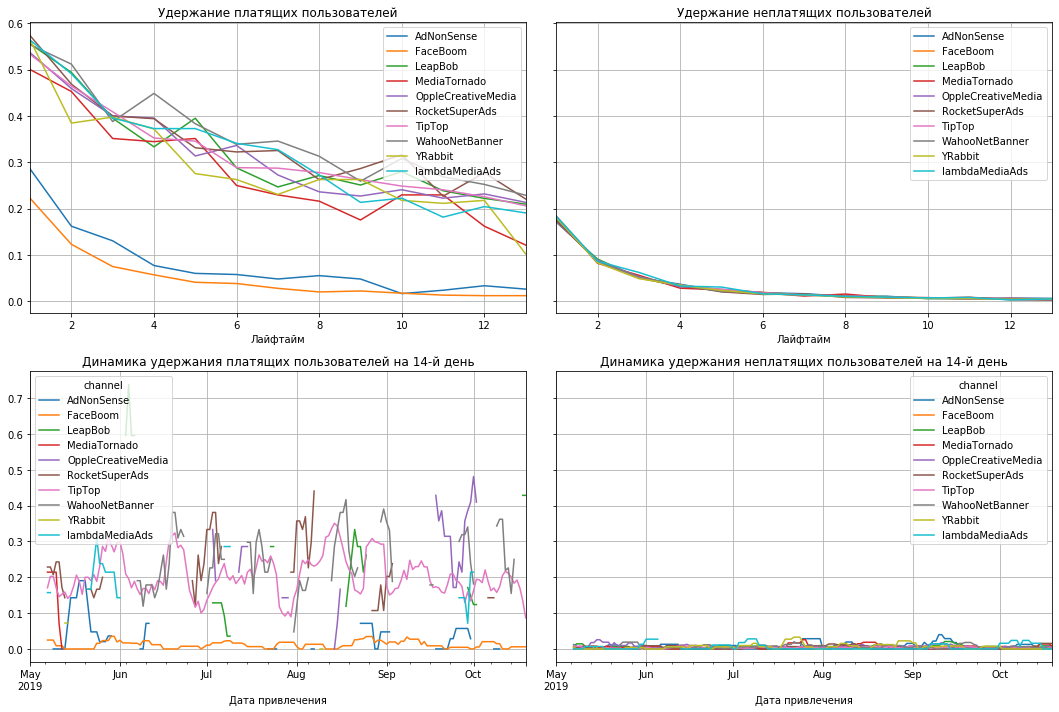

In [68]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

### Вывод

Проанализировали общую окупаемость рекламы. По результатам выявили, что реклама не окупается -  ROI примерно 80%. Динамика ROI пользователей на 14-й день падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.При этом стоимость привлечения пользователей растет. 

В разбивке по рекламным каналам выявили большой рост стоимости привлечения пользователей канала TipTop. При этом, у этого канала самая низкая окупаемость. Также не окупаются каналы AdNonSense, FaceBoom. Это три самых дорогих канала привлечения. Хорошо показала себя рекламная сеть YRabbit - у неё самый высокий ROI.

В разбивке по странам видим, что  основная аудитория пользователи США, но  уровень окупаемости в этой стране самый низкий. При этом стоимость привлечения пользователей в США самая высокая и она растет с течением времени. Причем окупаемость пользователей начала падать с конца мая 2019 года. Также видим что с конца мая 2019 года резко изменилась динамика стоимости привлечения, скорее всего было перераспределение рекламного бюджет, в США стали больше вкладывать на рекламу, одновременно с этим в других странах стоимость привлечения понизилась.  Также видим, что пользователи из США явно плохо удерживаются. Соответственно реклама привлекает не качественных пользователей, так скажем "одноразовых".
Лучше всего окупается Англия и Германия. 

Также выявили, что если исключить каналы привличения TipTop. AdNonSense, FaceBoom то окупаемость в CША становится выше чем в других странах и если посмотреть удержание по странам с исключением этих трех каналов - оно выравнивается. Можно сделать вывод, что эти канала привлекают много не качественных пользователей, при этом затраты на их привлечение слишком большие, поэтому они не окупаются.

Также в разбивке по устройствам  выявили что пользователи android, iphone и PC окупались до июня, пользователи Мас в конце июня начале июля тоже окупались, далее уровень окупаемости снизился, особенно для владельцев Mac и Iphone. Пользователи РС окупались до конца августа, ROI всех остальных устройств был уже ниже уровня начиная с июня. Вероятнее всего причина в том что  реклама  на каналах TipTop. AdNonSense, FaceBoom нацелена на пользователей мобильных устройств и пользователей Мас
 
Проблемы окупаемости могут быть вызваны неравномерным распределением средств на рекламу в какой-то источник вкладывается больше средств, чем в остальные, а он не оправдывает надежд.

## Выводы

### Причины неэффективности привлечения пользователей

Проблемы окупаемости могут быть вызваны неравномерным распределением средств на рекламу в какой-то источник вкладывается больше средств, чем в остальные, а он не оправдывает надежд. Как мы определили, есть три канала привлечения: TipTop, AdNonSense и FaceBoom, с самой низкой окупаемостью, при этом это три самых дорогих канала привлечения.

### Рекомендации для отдела маркетинга для повышения эффективности

Направить внимание по окупаемости следует на пользователей из США, уровень окупаемости в этой стране самый низкий, при этом стоимость привлечения пользователей в США самая высокая и она растет с течением времени. Также пользователи этой страны плохо удерживаются. Если исключить каналы привлечения TipTop, AdNonSense, FaceBoom то окупаемость в CША становится выше, чем в других странах и если посмотреть удержание по странам с исключением этих трех каналов - оно выравнивается. Можно сделать вывод, что эти канала привлекают много не качественных пользователей, при этом затраты на их привлечение слишком большие, поэтому они не окупаются. 

Рекомендуется пересмотреть рекламный бюджет и снизить затраты на рекламу  по каналам TipTop, AdNonSense, FaceBoom

Лучше всего окупается Англия и Германия. Возможно, стоит освободившийся бюджет распределить на рекламу в эти страны тоже.

Стоит обратить внимание на канал привлечение lambdaMediaAds на данный момент это самый не популярный канал привлечения, при этом доля платящих пользователей по этому каналу 10.47%, у него самая высокая конверсия и, при
этом, не высокие затраты на рекламу и динамика ROI пользователей на 14-й день в конце октября выше остальных каналов.